In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

np.set_printoptions(precision=4)
pd.set_option("display.precision", 4)

In [2]:
years = 3
date_to = "30.05.2023"

imoex_shares_path = "../data/tickers_info/imoex_shares.csv"
imoex_index_shares_path = "../data/tickers_info/imoex_index_shares.csv"
imoex_index_tickers_path = "../data/tickers_info/imoex_index_tickers.csv"
figi_load_path = "../data/historical/figi_to_load.txt"
daily_data_folder = f"../data/historical/daily_data_for_{years}_years_till_{datetime.strptime(date_to, '%d.%m.%Y').strftime('%Y-%m-%d')}/"

def daily_data_fname(ticker, uid):
    return f"{ticker}_{uid}.csv"

In [3]:
shares_info = pd.read_csv(imoex_index_shares_path)
shares_info.head(5)

,figi,ticker,name,uid
0,BBG000RMWQD4,ENPG,En+ Group,e2bd2eba-75de-4127-b39c-2f2dbe3866c3
1,BBG004PYF2N3,POLY,Polymetal,127361c2-32ec-448c-b3ec-602166f537ea
2,BBG004RVFCY3,MGNT,Магнит,ca845f68-6c43-44bc-b584-330d2a1e5eb7
3,BBG00ZHCX1X2,FIXP,Fix Price Group,ba64a3c7-dd1d-4f19-8758-94aac17d971b
4,BBG00178PGX3,VKCO,VK,3c0748ce-9b49-43e9-b788-048a6cb65174


In [15]:
common_df = None
for idx, info in shares_info.iterrows():
    cur_df = pd.read_csv(daily_data_folder + daily_data_fname(info["ticker"], info["uid"]), index_col=0)
    cur_df.index = pd.to_datetime(cur_df.index)
    cur_df = pd.DataFrame((cur_df["close"] - cur_df["open"]) / cur_df["open"], columns=[info["ticker"]])
    if common_df is None:
        common_df = cur_df
    else:
        common_df = common_df.join(cur_df)
common_df = common_df.fillna(0).sort_index()
common_df

,ENPG,POLY,MGNT,FIXP,VKCO,PHOR,AGRO,TATNP,MAGN,VTBR,...,AFKS,PLZL,OZON,LKOH,GLTR,SNGS,CBOM,PIKK,ROSN,CHMF
2020-05-29,-0.0024,-0.0134,-0.0181,0.0000,0.0000,-0.0252,0.0000,-0.0373,-0.0261,0.0114,...,0.0200,0.0250,0.0000,-0.0256,0.0000,-0.0179,0.0140,0.0076,0.0045,-0.0017
2020-06-01,0.0114,-0.0215,0.0219,0.0000,0.0000,0.0057,0.0006,0.0037,0.0054,0.0060,...,0.0230,-0.0215,0.0000,-0.0059,0.0000,-0.0047,0.0031,-0.0205,-0.0034,-0.0017
2020-06-02,0.0072,-0.0027,0.0127,0.0000,0.0000,0.0011,-0.0018,-0.0019,0.0024,0.0118,...,0.0240,-0.0209,0.0000,0.0080,0.0000,0.0025,0.0085,0.0032,0.0169,0.0070
2020-06-03,-0.0056,-0.0574,-0.0116,0.0000,0.0000,0.0071,-0.0009,0.0281,0.0188,0.0193,...,-0.0145,-0.0365,0.0000,0.0183,0.0000,-0.0121,0.0044,0.0119,0.0173,0.0042
2020-06-04,-0.0443,-0.0036,-0.0088,0.0000,0.0000,-0.0074,-0.0223,-0.0128,-0.0018,-0.0190,...,0.0601,0.0184,0.0000,-0.0182,0.0000,0.0035,-0.0074,0.0134,-0.0164,-0.0099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25,-0.0108,-0.0370,-0.0351,-0.0133,-0.0048,-0.0095,0.0111,-0.0053,0.0085,-0.0161,...,-0.0039,-0.0095,-0.0019,0.0011,-0.0003,-0.0064,-0.0215,-0.0024,-0.0176,0.0127
2023-05-26,-0.0054,0.0355,0.0248,0.0023,0.0329,0.0106,0.0331,0.0051,-0.0060,0.0058,...,0.0034,0.0130,-0.0056,0.0171,-0.0017,0.0075,-0.0086,0.0150,0.0094,-0.0042
2023-05-27,-0.0027,-0.0045,0.0090,0.0000,0.0108,0.0125,-0.0020,0.0091,-0.0018,-0.0066,...,-0.0042,0.0093,0.0070,0.0083,0.0000,-0.0063,0.0009,0.0004,0.0030,-0.0042
2023-05-28,0.0110,0.0003,-0.0140,0.0000,0.0011,-0.0117,-0.0071,-0.0071,-0.0072,-0.0073,...,-0.0037,-0.0018,-0.0066,-0.0063,0.0000,0.0008,-0.0005,0.0006,-0.0005,0.0020


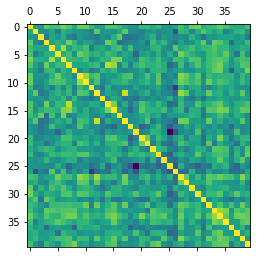

In [53]:
plt.matshow(common_df.tail(30).corr())

In [45]:
common_df.columns

Index(['ENPG', 'POLY', 'MGNT', 'FIXP', 'VKCO', 'PHOR', 'AGRO', 'TATNP', 'MAGN',
       'VTBR', 'AFLT', 'RUAL', 'SBER', 'ALRS', 'TATN', 'FIVE', 'GAZP', 'SBERP',
       'RTKM', 'MTSS', 'TRNFP', 'IRAO', 'HYDR', 'NLMK', 'TCSG', 'SNGSP',
       'YNDX', 'NVTK', 'GMKN', 'MOEX', 'AFKS', 'PLZL', 'OZON', 'LKOH', 'GLTR',
       'SNGS', 'CBOM', 'PIKK', 'ROSN', 'CHMF'],
      dtype='object')

In [50]:
np.corrcoef(common_df["SNGS"], common_df["SNGSP"])

array([[1.    , 0.5235],
       [0.5235, 1.    ]])